In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy
from matplotlib import pyplot

import calibr8

### The Generalized Logistic Function
Real-world calibration curves rarely follow linear dose/response relationships, but often exhibit lower & upper saturations.
These relationships can be described with S-shaped functions.
The logistic function (the _sigmoid curve_ is a special case of it) is often well suited for real-world calibration curves.

Several different flavors of S-shaped curves are available:
+ [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) (1 parameter: variable slope)
+ [logistic](https://en.wikipedia.org/wiki/Logistic_function) (3 parameters: variable upper limit, variable x-value of the inflection point, variable slope)
+ [generalized logistic](https://en.wikipedia.org/wiki/Generalised_logistic_function) (5 parameters: variable limits, variable inflection point, variable slope, variable symmetry)

Here, we're going to use the generalized logistic, because it is most useful.

$$f(x)=L_L + \frac{L_U - L_L}{(1 +  e^{-k\cdot (x-I_x)})^{1/v}}$$

The following table shows the bounds & interpretation of its 5 paramters:

| parameter     | interpretation
| ----- | -- |
| $L_L \in \mathcal{R} $ | lower asymptote |
| $L_U \in \mathcal{R} $ | upper asymptote |
| $I_x \in \mathcal{R} $ | x-value of the inflection point (for v=1) |
| $k \in \mathcal{R} $ | growth rate |
| $v \gt 0$ | moves the inflection point between $L_L$ ($0 < v < 1$) and $L_U$ ($1 < v$) limit |

### Example 1 (symmetric)
To visualize the meaning of the parameters, we can draw the function with a symmetric parameterization:

In [3]:
help(calibr8.asymmetric_logistic)

Help on function asymmetric_logistic in module calibr8.core:

asymmetric_logistic(x, theta)
    5-parameter asymmetric logistic model.
    
    Args:
        x (array): independent variable
        theta (array): parameters of the logistic model
            L_L: lower asymptote
            L_U: upper asymptote
            I_x: x-value at inflection point (v=1)
            k: growth rate
            v: symmetry parameter
    
    Returns:
        y (array): dependent variable



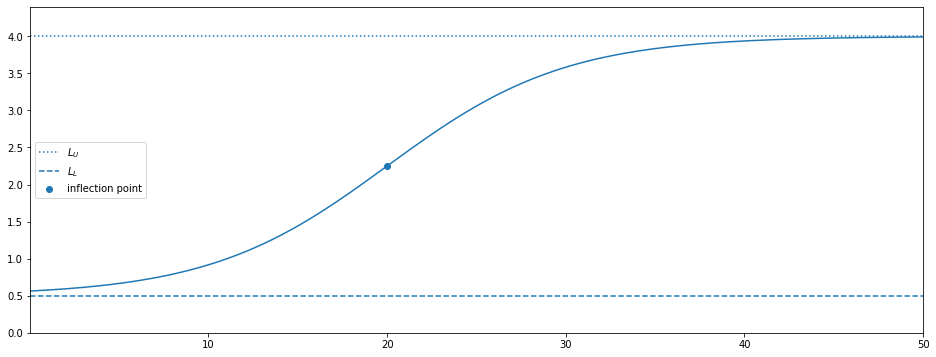

In [4]:
theta = [
    0.5,    # L_L
    4,      # L_U
    20,    # I_x
    0.2,   # k
    1   # v
]
L_L, L_U, I_x, k, v = theta

fig, ax = pyplot.subplots(figsize=(16,6))

X_MIN = 0.02
X_MAX = 50
x = numpy.exp(numpy.linspace(numpy.log(X_MIN), numpy.log(X_MAX), 1000))
y = calibr8.asymmetric_logistic(x, theta)

ax.plot(x, y)
ax.scatter([I_x], [(L_L+L_U)/2], label='inflection point')
ax.axhline(L_U, linestyle=':', label='$L_U$')
ax.axhline(L_L, linestyle='--', label='$L_L$')
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(0, L_U*1.1)

x = numpy.linspace(-5,5,100)
ax.legend(loc='center left')
pyplot.show()

### Example 2 (asymmetric)
Let's say we have an assay with noticeable lower- and upper satuation limits, as well as some asymmetry.

To illustrate, we can just come up with parameter values and stick them into `calibr8.asymmetric_logistic`:

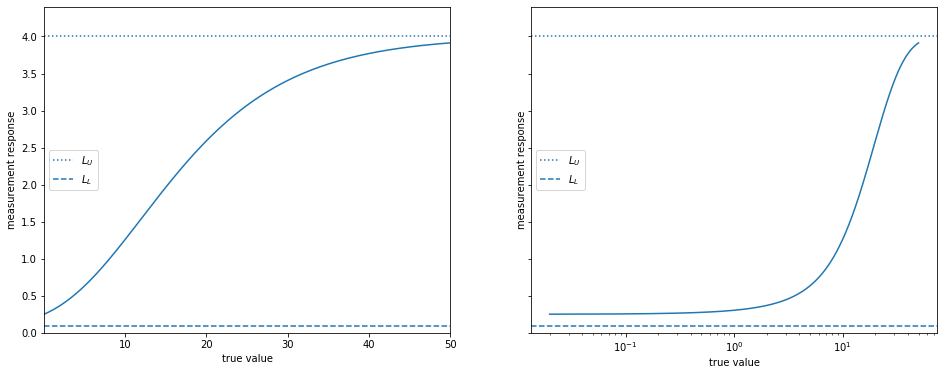

In [5]:
theta = [
    0.1,    # L_L
    4,      # L_U
    -30,    # I_x
    0.10,   # k
    0.015   # v
]
L_L, L_U, I_x, k, v = theta

fig, (left, right) = pyplot.subplots(ncols=2, figsize=(16,6), sharey=True)

X_MIN = 0.02
X_MAX = 50
x = numpy.exp(numpy.linspace(numpy.log(X_MIN), numpy.log(X_MAX), 1000))
y = calibr8.asymmetric_logistic(x, theta)

left.plot(x, y)
left.set_xlabel('true value')
left.set_ylabel('measurement response')
left.axhline(L_U, linestyle=':', label='$L_U$')
left.axhline(L_L, linestyle='--', label='$L_L$')
left.set_xlim(X_MIN, X_MAX)
left.set_ylim(0, L_U*1.1)
left.legend(loc='center left')

right.plot(x, y)
right.axhline(L_U, linestyle=':', label='$L_U$')
right.axhline(L_L, linestyle='--', label='$L_L$')
right.set_xlabel('true value')
right.set_ylabel('measurement response')
right.set_xscale('log')
right.legend(loc='center left')
pyplot.show()

### Summary
+ The generalized logistic function can describe relationships with lower & upper satuation
+ Even in cases of "good linear relationships", the GLF is applicable
+ The parameterization is not that intuitive (it can be reparameterized, but it results in numerical instability)